<a href="https://colab.research.google.com/github/johnjustine5646/ML_Project_MSAIM/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing relevant libraries for calulations and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
#importing dataframe
data=pd.read_csv('/content/drive/MyDrive/Project_dataset.csv')
data.head()

,BRAND,STYLE,SIZE,COLOR,DESIGN NO,MATERIAL,WORK TYPE,SHADE,OUTLET NAME,MRC No,Item Name,Barcode Value,Total Qty(Inward),Sold Qty,Current Stock,MRP
0,SCT,CROP TOP,RL,BLUE,6136,VELVET,THREAD/MIRROR/SEQUENCE,DARK,AARUSHE ETHNIC WORLD JAYANAGAR,TI1,LEHENGA,83032292,1.0,1.0,0.0,"9,995.00"
1,SCT,CROP TOP,RL,BLUE,6136,VELVET,THREAD/MIRROR/SEQUENCE,DARK,Aarushe Ethnic New Bel Road,TI1,LEHENGA,83032292,1.0,1.0,0.0,"9,995.00"
2,SCT,CROP TOP,XL,BLUE,6136,VELVET,THREAD/MIRROR/SEQUENCE,DARK,AARUSHE ETHNIC WORLD JAYANAGAR,TI1,LEHENGA,83032293,1.0,0.0,0.0,"9,995.00"
3,SCT,CROP TOP,XL,BLUE,6136,VELVET,THREAD/MIRROR/SEQUENCE,DARK,Aarushe Ethnic New Bel Road,TI1,LEHENGA,83032293,1.0,1.0,0.0,"9,995.00"
4,RAA,CROP TOP,RL,PEACH,1347,GEORGETTE,SEQUENCE/THREAD,LIGHT,Aarushe Ethnic New Bel Road,TI1,LEHENGA,83032294,1.0,1.0,0.0,"17,995.00"


In [ ]:
#removing irrelevant columns
data=data.drop(['MRC No','Barcode Value'],axis=1)

In [ ]:
#checking the column datatype and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8296 entries, 0 to 8295
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BRAND              8296 non-null   object 
 1   STYLE              8296 non-null   object 
 2   SIZE               8296 non-null   object 
 3   COLOR              8296 non-null   object 
 4   DESIGN NO          8296 non-null   object 
 5   MATERIAL           8296 non-null   object 
 6   WORK TYPE          8264 non-null   object 
 7   SHADE              8179 non-null   object 
 8   OUTLET NAME        8296 non-null   object 
 9   Item Name          8296 non-null   object 
 10  Total Qty(Inward)  8296 non-null   float64
 11  Sold Qty           8296 non-null   float64
 12  Current Stock      8296 non-null   float64
 13  MRP                8296 non-null   object 
dtypes: float64(3), object(11)
memory usage: 907.5+ KB


In [ ]:
#dropping the null values
data=data.dropna()
data.reset_index(inplace=True)

In [ ]:
#converting MRP column from string to float for computation
data['MRP']=data["MRP"].str.replace(',','')
data['MRP']=data['MRP'].astype(float)

<ipython-input-7-f37c84e0eb12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MRP']=data["MRP"].str.replace(',','')
<ipython-input-7-f37c84e0eb12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MRP']=data['MRP'].astype(float)


<Axes: >

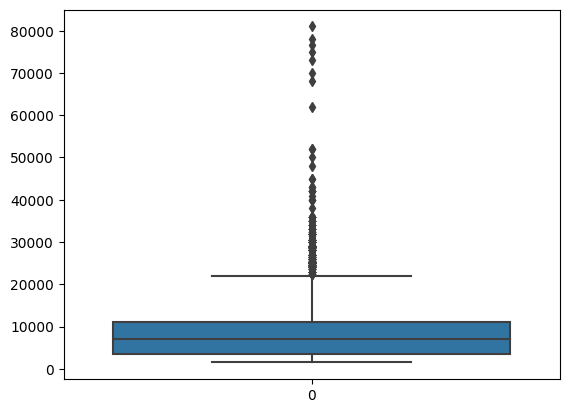

In [ ]:
#plotting MRP for visualizing outliers
sns.boxplot(data['MRP'])

In [ ]:
#creating a function to handle outliers using IQR
def find_outliers_IQR(df):
   print(data.shape)
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   data.drop(data.index[outliers.index],inplace=True)
   #data.reset_index(inplace=True)
   print(data.shape)
   return
find_outliers_IQR(data['MRP'])


(8148, 15)
(7702, 15)


<Axes: xlabel='Item Name', ylabel='Sold Qty'>

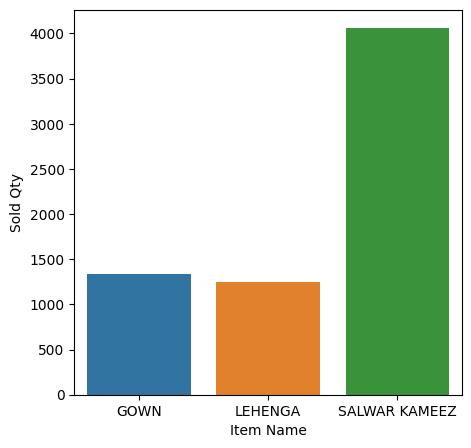

In [ ]:
#plotting the sales based on item name
plt.figure(figsize=(5, 5))
sns.barplot(x=data.groupby(['Item Name'])['Sold Qty'].sum().index,y=data.groupby(['Item Name'])['Sold Qty'].sum())

In [ ]:
#handling human data entry
print(data['STYLE'].unique())
data=data.replace('STARIGHT PANT','STRAIGHT PANT')

['CROP TOP' 'FLOOR LENGTH' 'HALF SAREE' 'STRAIGHT PANT' 'PALAZZO'
 'SHARARA' 'WESTERN' 'JACKET' 'ANARKALI' 'DESIGNER' 'BALL' 'STARIGHT PANT'
 'INDO-WESTERN' 'PEPLUM' 'JUMPSUIT' 'KAFTAN']


In [ ]:
#merging similar characteristics into same group
data=data.replace('RL','L')
data=data.replace('XXL','2XL')
data=data.replace('3XL','2XL')
data=data.replace('4XL','2XL')
data=data.replace('5XL','2XL')

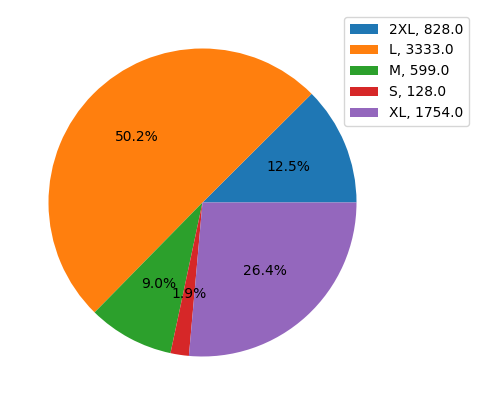

In [ ]:
#plotting sales based on size
ax=data.groupby(['SIZE'])['Sold Qty'].sum()
plt.figure(figsize=(5,5))
labels = [f'{l}, {s:0.1f}' for l, s in zip(ax.index, ax.values)]
plt.pie(ax,autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()

<Axes: xlabel='Item Name'>

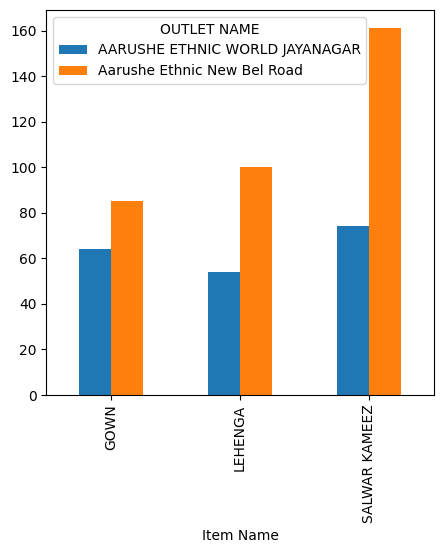

In [ ]:
#plotting current stock based on item name
data.groupby(['Item Name', 'OUTLET NAME'])['Current Stock'].sum().unstack().plot(kind='bar', figsize=(5, 5))

<Axes: xlabel='Current Stock', ylabel='STYLE'>

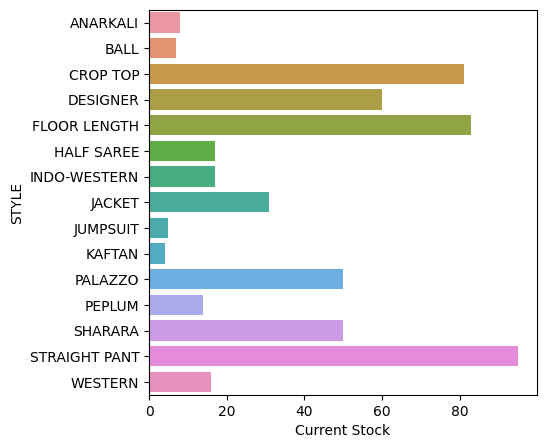

In [ ]:
#plotting current stock based on style
plt.figure(figsize=(5, 5))
sns.barplot(y=data.groupby(['STYLE'])['Current Stock'].sum().index,x=data.groupby(['STYLE'])['Current Stock'].sum(),orient='h')

In [ ]:
#assigning numeric values to categorical data
from sklearn.preprocessing import LabelEncoder
for col in data.columns[~data.columns.isin(['Total Qty(Inward)','Sold Qty','Current Stock','MRP'])]:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])

In [ ]:
data.head()

,index,BRAND,STYLE,SIZE,COLOR,DESIGN NO,MATERIAL,WORK TYPE,SHADE,OUTLET NAME,Item Name,Total Qty(Inward),Sold Qty,Current Stock,MRP
0,0,44,2,1,2,1109,17,133,0,0,1,1.0,1.0,0.0,9995.0
1,1,44,2,1,2,1109,17,133,0,1,1,1.0,1.0,0.0,9995.0
2,2,44,2,4,2,1109,17,133,0,0,1,1.0,0.0,0.0,9995.0
3,3,44,2,4,2,1109,17,133,0,1,1,1.0,1.0,0.0,9995.0
4,4,36,2,1,16,230,4,117,1,1,1,1.0,1.0,0.0,17995.0


In [ ]:
#preprocessing sold qty for logistic regression model
print(data['Sold Qty'].unique())
data['Sold Qty']=data['Sold Qty'].replace(3.0,1.0)
data['Sold Qty']=data['Sold Qty'].replace(2.0,1.0)

[1. 0. 2. 3.]


In [ ]:
X = data[['MRP', 'BRAND' ,'STYLE' ,'WORK TYPE','OUTLET NAME']]
Y = data['Sold Qty']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
accuracy

0.8513951979234263

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       229
         1.0       0.85      1.00      0.92      1312

    accuracy                           0.85      1541
   macro avg       0.43      0.50      0.46      1541
weighted avg       0.72      0.85      0.78      1541



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#creating confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

<Axes: >

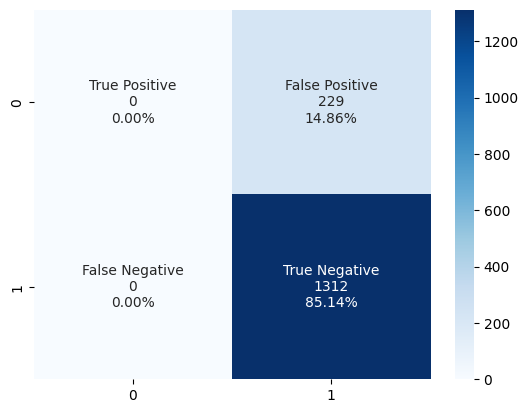

In [ ]:
#visualizing confusion matrix
labels=group_names=['True Positive','False Positive','False Negative','True Negative']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
         zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
#evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, matthews_corrcoef
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's kappa score:", kappa)
matthews = matthews_corrcoef(y_test, y_pred)
print("Matthews correlation coefficient:", matthews)

Precision: 0.8513951979234263
Recall: 1.0
F1-score: 0.9197336137399229
ROC AUC: 0.5
Cohen's kappa score: 0.0
Matthews correlation coefficient: 0.0


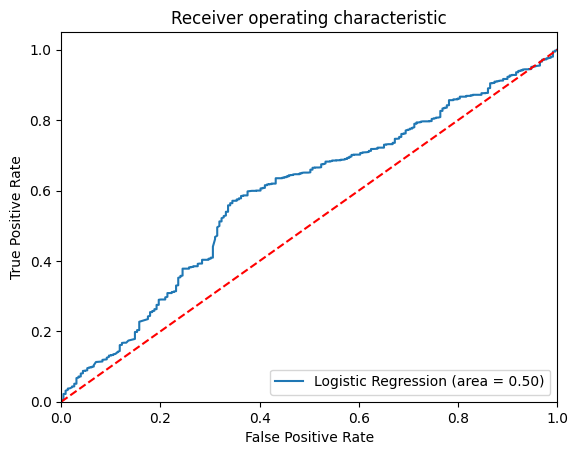

In [ ]:
#Ploting the ROC curve and calculating the AUC.
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

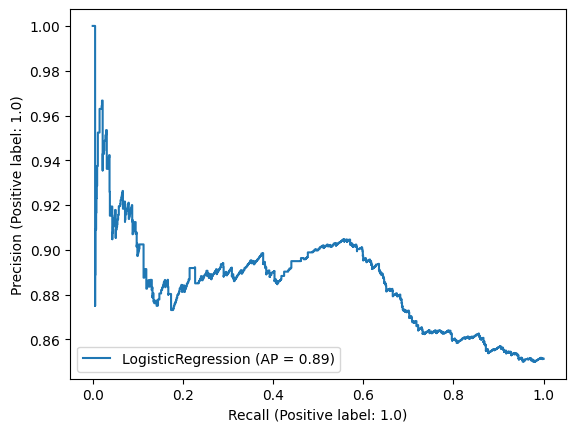

In [ ]:
#Visualizing the precision-recall curve.
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
plt.show ()

In [ ]:
from sklearn.metrics import log_loss as ll
logloss=ll(y_test,y_pred)
logloss

5.356259978006378

In [ ]:
#fixing features and target variable
X=data[['MRP','BRAND','STYLE','WORK TYPE','OUTLET NAME']]
y=data['Sold Qty']

In [ ]:
#spliting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=2)

In [ ]:
#running the model
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier()
rnd_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#accuracy score
from sklearn.metrics import accuracy_score
y_pred=rnd_clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy


0.8338381652964085

In [ ]:
#evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, matthews_corrcoef
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's kappa score:", kappa)
matthews = matthews_corrcoef(y_test, y_pred)
print("Matthews correlation coefficient:", matthews)

Precision: 0.8774439675727229
Recall: 0.9354346720894764
F1-score: 0.9055118110236221
ROC AUC: 0.5941708244168312
Cohen's kappa score: 0.22312935413102974
Matthews correlation coefficient: 0.23127126051345762


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
true_labels, predicted_labels = y_test, y_pred
confusion_matrix_rnd_clf=confusion_matrix(true_labels, predicted_labels)
confusion_matrix_rnd_clf

array([[  87,  257],
       [ 127, 1840]])

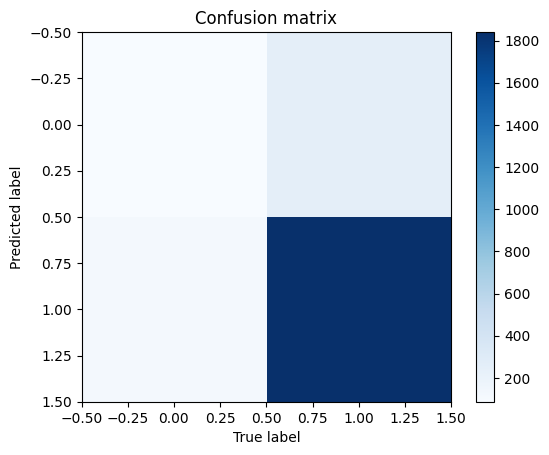

In [ ]:
#plotting the confusion matrix
plt.imshow(confusion_matrix_rnd_clf, cmap="Blues")
plt.colorbar()
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title("Confusion matrix")
plt.show()

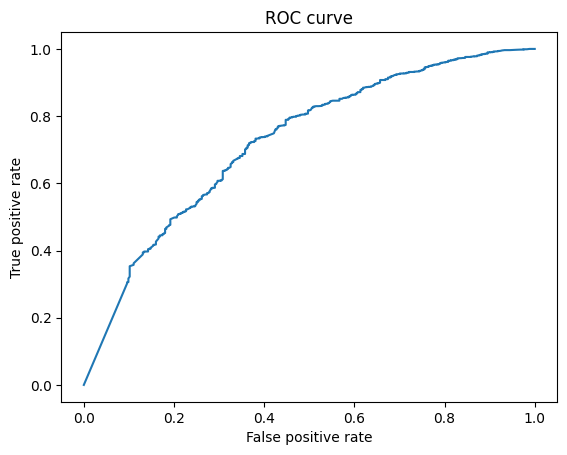

AUC: 0.7235571523155317


In [ ]:
#plotting the roc curve
from sklearn.metrics import roc_curve, auc
predicted_probabilities=rnd_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)
auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.show()
print("AUC:", auc)

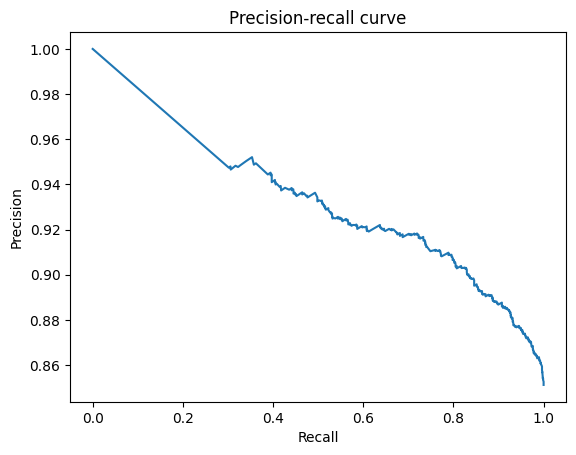

In [ ]:
#ploting the precision and recall curve
from sklearn.metrics import precision_recall_curve, auc
true_labels, predicted_probabilities = y_test, rnd_clf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(true_labels, predicted_probabilities)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-recall curve")
plt.show()